# TP ANAD PCA 

## Importation des modules nécessaires 

In [1]:
import pandas as pd # Lécture des fichers excel et prétraitement 
import numpy as np # Calcule etc...
from sklearn.decomposition import PCA # Pour faire l'ACP
from sklearn import preprocessing # Pour centrer et réduire nos donnée
import matplotlib.pyplot as plt # Pour déssiner les graphes

## Lécture du fichier excel 

In [2]:
Data_sem_2 = pd.read_excel("PV1CSS2.xlsx")

In [3]:
print(Data_sem_2.shape)

(162, 9)


In [4]:
Data_sem_2

,MCSI * x 5,BDD * x 5,SEC * x 1,CPROJ * x 3,PROJ * x 3,LANG2 * x 2,ARCH * x 4,SYS2 * x 4,RES2 * x 3
0,14.66,17.60,17.12,15.15,16.89,17.34,17.59,18.90,16.34
1,12.56,17.55,17.42,15.55,15.71,16.93,17.66,16.90,17.62
2,10.69,15.70,16.21,16.33,15.71,17.10,16.90,16.10,15.98
3,12.53,15.66,15.34,15.08,16.55,16.92,16.05,14.20,16.70
4,13.76,16.35,9.62,14.05,16.24,16.09,14.60,15.10,16.15
...,...,...,...,...,...,...,...,...,...
157,MCSI: 5.56 < 6.26,8.85,SEC: 3.58 < 5.00,9.45,11.10,14.77,12.29,SYS2: 5.72 < 6.21,9.59
158,MCSI: 5.79 < 6.26,BDD: 6.69 < 7.33,SEC: 1.79 < 5.00,11.85,16.00,13.02,10.05,SYS2: 2.80 < 6.21,7.72
159,MCSI: 2.68 < 6.26,8.65,SEC: 1.58 < 5.00,13.30,14.40,10.30,9.44,SYS2: 4.30 < 6.21,9.46
160,11.52,BDD: 3.10 < 7.33,SEC: 1.75 < 5.00,15.38,16.99,12.56,ARCH: 4.61 < 7.81,SYS2: 1.20 < 6.21,RES2: 2.34 < 7.53


## Prétraitement des données

### 1) Rennomage des colonnes
Pour renommer les colonnes on doit d'abord trouver leur noms actuel et puis les chnager

In [5]:
names_col = [] 
for col in Data_sem_2.columns:
    names_col.append(col)
names_col

['MCSI\xa0*\xa0x 5',
 'BDD\xa0*\xa0x 5',
 'SEC\xa0*\xa0x 1',
 'CPROJ\xa0*\xa0x 3',
 'PROJ\xa0*\xa0x 3',
 'LANG2\xa0*\xa0x 2',
 'ARCH\xa0*\xa0x 4',
 'SYS2\xa0*\xa0x 4',
 'RES2\xa0*\xa0x 3']

* On constate que le nom de chaque colonne contient des "\xa" au lieu des espace " " donc il faut faire attention!

In [6]:
data_renomme = Data_sem_2.rename(columns={"MCSI\xa0*\xa0x 5": "MCSI", "BDD\xa0*\xa0x 5": "BDD", "SEC\xa0*\xa0x 1": "SEC", "CPROJ\xa0*\xa0x 3": "CPROJ", "PROJ\xa0*\xa0x 3": "PROJ", "LANG2\xa0*\xa0x 2": "LANG2", "ARCH\xa0*\xa0x 4": "ARCH", "SYS2\xa0*\xa0x 4": "SYS2", "RES2\xa0*\xa0x 3": "RES2"})
data_renomme

,MCSI,BDD,SEC,CPROJ,PROJ,LANG2,ARCH,SYS2,RES2
0,14.66,17.60,17.12,15.15,16.89,17.34,17.59,18.90,16.34
1,12.56,17.55,17.42,15.55,15.71,16.93,17.66,16.90,17.62
2,10.69,15.70,16.21,16.33,15.71,17.10,16.90,16.10,15.98
3,12.53,15.66,15.34,15.08,16.55,16.92,16.05,14.20,16.70
4,13.76,16.35,9.62,14.05,16.24,16.09,14.60,15.10,16.15
...,...,...,...,...,...,...,...,...,...
157,MCSI: 5.56 < 6.26,8.85,SEC: 3.58 < 5.00,9.45,11.10,14.77,12.29,SYS2: 5.72 < 6.21,9.59
158,MCSI: 5.79 < 6.26,BDD: 6.69 < 7.33,SEC: 1.79 < 5.00,11.85,16.00,13.02,10.05,SYS2: 2.80 < 6.21,7.72
159,MCSI: 2.68 < 6.26,8.65,SEC: 1.58 < 5.00,13.30,14.40,10.30,9.44,SYS2: 4.30 < 6.21,9.46
160,11.52,BDD: 3.10 < 7.33,SEC: 1.75 < 5.00,15.38,16.99,12.56,ARCH: 4.61 < 7.81,SYS2: 1.20 < 6.21,RES2: 2.34 < 7.53


### 2) Vérification des valeurs nuls

In [7]:
data_renomme.isnull().sum()

MCSI     0
BDD      0
SEC      0
CPROJ    0
PROJ     0
LANG2    0
ARCH     0
SYS2     0
RES2     1
dtype: int64

In [8]:
Data_non_nul = data_renomme.dropna(subset=["MCSI", "BDD", "SEC", "CPROJ", "PROJ", "LANG2", "ARCH", "SYS2", "RES2"])
Data_non_nul.isnull().sum()

MCSI     0
BDD      0
SEC      0
CPROJ    0
PROJ     0
LANG2    0
ARCH     0
SYS2     0
RES2     0
dtype: int64

### 3) Corriger l'incohérance 

In [9]:
Data_non_nul

,MCSI,BDD,SEC,CPROJ,PROJ,LANG2,ARCH,SYS2,RES2
0,14.66,17.60,17.12,15.15,16.89,17.34,17.59,18.90,16.34
1,12.56,17.55,17.42,15.55,15.71,16.93,17.66,16.90,17.62
2,10.69,15.70,16.21,16.33,15.71,17.10,16.90,16.10,15.98
3,12.53,15.66,15.34,15.08,16.55,16.92,16.05,14.20,16.70
4,13.76,16.35,9.62,14.05,16.24,16.09,14.60,15.10,16.15
...,...,...,...,...,...,...,...,...,...
156,MCSI: 3.75 < 6.26,9.25,SEC: 4.92 < 5.00,11.35,11.10,12.92,11.60,8.12,11.01
157,MCSI: 5.56 < 6.26,8.85,SEC: 3.58 < 5.00,9.45,11.10,14.77,12.29,SYS2: 5.72 < 6.21,9.59
158,MCSI: 5.79 < 6.26,BDD: 6.69 < 7.33,SEC: 1.79 < 5.00,11.85,16.00,13.02,10.05,SYS2: 2.80 < 6.21,7.72
159,MCSI: 2.68 < 6.26,8.65,SEC: 1.58 < 5.00,13.30,14.40,10.30,9.44,SYS2: 4.30 < 6.21,9.46


In [10]:
Data_coherente = Data_non_nul
Data_coherente.MCSI = Data_coherente['MCSI'].mask(Data_coherente['MCSI'].str.len() > 8, Data_coherente['MCSI'].str[-5:])
Data_coherente.BDD = Data_coherente['BDD'].mask(Data_coherente['BDD'].str.len() > 8, Data_coherente['BDD'].str[-5:])
Data_coherente.SEC = Data_coherente['SEC'].mask(Data_coherente['SEC'].str.len() > 8, Data_coherente['SEC'].str[-5:])
Data_coherente.CPROJ = Data_coherente['CPROJ'].mask(Data_coherente['CPROJ'].str.len() > 8, Data_coherente['CPROJ'].str[-5:])
Data_coherente.PROJ = Data_coherente['PROJ'].mask(Data_coherente['PROJ'].str.len() > 8, Data_coherente['PROJ'].str[-5:])
Data_coherente.LANG2 = Data_coherente['LANG2'].mask(Data_coherente['LANG2'].str.len() > 8, Data_coherente['LANG2'].str[-5:])
Data_coherente.ARCH = Data_coherente['ARCH'].mask(Data_coherente['ARCH'].str.len() > 8, Data_coherente['ARCH'].str[-5:])
Data_coherente.SYS2 = Data_coherente['SYS2'].mask(Data_coherente['SYS2'].str.len() > 8, Data_coherente['SYS2'].str[-5:])
Data_coherente.RES2 = Data_coherente['RES2'].mask(Data_coherente['RES2'].str.len() > 8, Data_coherente['RES2'].str[-5:])

C:\Users\Xodios\AppData\Local\Temp\ipykernel_15352\2926156856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_coherente.MCSI = Data_coherente['MCSI'].mask(Data_coherente['MCSI'].str.len() > 8, Data_coherente['MCSI'].str[-5:])
C:\Users\Xodios\AppData\Local\Temp\ipykernel_15352\2926156856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_coherente.BDD = Data_coherente['BDD'].mask(Data_coherente['BDD'].str.len() > 8, Data_coherente['BDD'].str[-5:])
C:\Users\Xodios\AppData\Local\Temp\ipykernel_1

In [11]:
Data_coherente

,MCSI,BDD,SEC,CPROJ,PROJ,LANG2,ARCH,SYS2,RES2
0,14.66,17.60,17.12,15.15,16.89,17.34,17.59,18.90,16.34
1,12.56,17.55,17.42,15.55,15.71,16.93,17.66,16.90,17.62
2,10.69,15.70,16.21,16.33,15.71,17.10,16.90,16.10,15.98
3,12.53,15.66,15.34,15.08,16.55,16.92,16.05,14.20,16.70
4,13.76,16.35,9.62,14.05,16.24,16.09,14.60,15.10,16.15
...,...,...,...,...,...,...,...,...,...
156,6.26,9.25,5.00,11.35,11.10,12.92,11.60,8.12,11.01
157,6.26,8.85,5.00,9.45,11.10,14.77,12.29,6.21,9.59
158,6.26,7.33,5.00,11.85,16.00,13.02,10.05,6.21,7.72
159,6.26,8.65,5.00,13.30,14.40,10.30,9.44,6.21,9.46


#### Remarque:
* On aurait pu faire une méthode meilleure que celci mais je l'ai fait moi-même (pas du copier coller) donc je vais la laisser:) Esperant que ça fonctionne:))

### 4) Numérisation de nos valeurs

In [12]:
Data_coherente.dtypes

MCSI     object
BDD      object
SEC      object
CPROJ    object
PROJ     object
LANG2    object
ARCH     object
SYS2     object
RES2     object
dtype: object

* On constate que la valeur du 13eme personne du module CPROG est invalde et c'est celle d'omar namous (Après une longue recherche) du coup on la change à sa valeur correcte 15.21

In [13]:
Data_finale = Data_coherente
Data_finale.at[12,"CPROJ"] = "15.21"

In [14]:
Data_finale['MCSI'] =pd.to_numeric(Data_finale['MCSI'])
Data_finale['BDD'] =pd.to_numeric(Data_finale['BDD'])
Data_finale['SEC'] =pd.to_numeric(Data_finale['SEC'])
Data_finale['CPROJ'] =pd.to_numeric(Data_finale['CPROJ'])
Data_finale['PROJ'] =pd.to_numeric(Data_finale['PROJ'])
Data_finale['LANG2'] =pd.to_numeric(Data_finale['LANG2'])
Data_finale['ARCH'] =pd.to_numeric(Data_finale['ARCH'])
Data_finale['SYS2'] =pd.to_numeric(Data_finale['SYS2'])
Data_finale['RES2'] =pd.to_numeric(Data_finale['RES2'])


C:\Users\Xodios\AppData\Local\Temp\ipykernel_15352\2210913331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_finale['MCSI'] =pd.to_numeric(Data_finale['MCSI'])
C:\Users\Xodios\AppData\Local\Temp\ipykernel_15352\2210913331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_finale['BDD'] =pd.to_numeric(Data_finale['BDD'])
C:\Users\Xodios\AppData\Local\Temp\ipykernel_15352\2210913331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [15]:
Data_finale.dtypes

MCSI     float64
BDD      float64
SEC      float64
CPROJ    float64
PROJ     float64
LANG2    float64
ARCH     float64
SYS2     float64
RES2     float64
dtype: object

In [16]:
Data_finale.describe()

,MCSI,BDD,SEC,CPROJ,PROJ,LANG2,ARCH,SYS2,RES2
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,10.544286,12.326335,8.620000,13.482360,15.318012,14.405714,13.119876,10.498137,12.667764
std,1.840143,1.930593,3.207341,1.216805,1.346793,2.001129,1.922817,2.526939,1.770068
min,6.260000,7.330000,3.620000,9.450000,11.100000,8.550000,7.810000,6.210000,7.530000
25%,9.340000,11.200000,5.380000,12.850000,14.440000,13.750000,11.800000,8.550000,11.540000
50%,10.620000,12.150000,8.250000,13.480000,15.410000,14.790000,13.100000,10.570000,12.660000
75%,11.860000,13.600000,10.790000,14.250000,16.500000,15.650000,14.620000,12.300000,13.840000
max,14.660000,17.600000,17.420000,16.330000,17.910000,17.510000,17.890000,18.900000,17.620000


## L'analyse des composantes principales

### 1) Normalisation de nos données:
* Nos données doivent être centrés réduites

In [17]:
#Donnes_normalise = preprocessing.scale(Data_finale)
Donnes_normalise = (Data_finale - Data_finale.mean())/Data_finale.std()

In [18]:
Donnes_normalise.iloc[:].sum()#ça devrais donner 0 (la on très pres c'est dû au arrondissement).

MCSI     6.394885e-14
BDD      5.684342e-14
SEC     -4.973799e-14
CPROJ   -3.481659e-13
PROJ     9.947598e-14
LANG2    1.314504e-13
ARCH    -1.563194e-13
SYS2     7.105427e-15
RES2     1.207923e-13
dtype: float64

## L'analyse des composante principale:

In [19]:
ACP= PCA()
ACP.fit(Donnes_normalise)
Donnes_ACP = pd.DataFrame(ACP.transform(Donnes_normalise))
Donnes_ACP

,0,1,2,3,4,5,6,7,8
0,6.629458,-0.466922,0.421273,0.244681,0.587124,-0.018480,-0.340201,0.430134,0.768978
1,6.296030,0.483786,0.119580,-0.224235,-0.070992,-0.494259,-0.367682,-0.284204,-0.171087
2,5.030829,0.453018,-0.221409,-0.359864,-1.247743,-0.885893,-0.462859,0.244817,0.079744
3,4.633791,-0.370299,-0.054340,0.380803,-0.109971,-0.591544,-0.046732,-0.316511,-0.333864
4,3.679510,-0.520736,0.438098,0.237812,0.517166,1.004558,0.425874,-0.932771,0.531286
...,...,...,...,...,...,...,...,...,...
156,-3.689910,3.210336,-0.500027,-0.760156,0.124401,-0.108105,0.494025,-0.079334,-0.158752
157,-4.469322,3.746753,-0.744625,0.750041,0.855722,0.311744,0.356442,0.651770,-0.581989
158,-5.042429,0.049927,0.220951,0.940001,-0.774347,-0.957250,-0.474340,0.950567,0.405339
159,-4.603523,0.291619,0.108569,-1.144752,-0.894079,-1.014139,-0.590486,-0.253726,0.055954


In [20]:
information_apporte = np.round(ACP.explained_variance_ratio_*100,decimals=1)
Label = ['CP'+str(num) for num in range(1,len(information_apporte)+1)]
information_apporte

array([44.4, 13.3, 11.3,  8. ,  6.5,  5.6,  4.1,  4.1,  2.6])

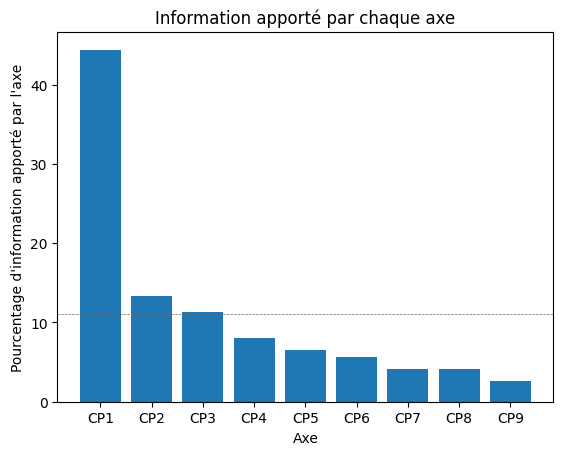

In [21]:
plt.bar(x=range(1,len(information_apporte)+1),height=information_apporte, tick_label = Label)
plt.ylabel("Pourcentage d\'information apporté par l'axe")
plt.xlabel("Axe")
plt.axhline(y = 11.11, linewidth = .5, color = "dimgray", linestyle = "--")
plt.title("Information apporté par chaque axe")
plt.show()

#### Les valeurs propres:

In [22]:
valeurs_propres = ACP.explained_variance_
valeurs_propres

array([3.99930806, 1.19430853, 1.01530709, 0.72405231, 0.58664804,
       0.50593133, 0.37128893, 0.36621966, 0.23693605])

#### Les vecteurs propres:

In [23]:
vecteurs_propres = pd.DataFrame(ACP.components_, columns=["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8","CP9"],index=["MCSI", "BDD", "SEC", "CPROJ", "PROJ", "LANG2", "ARCH", "SYS2", "RES2"])
vecteurs_propres

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9
MCSI,0.269382,0.403674,0.367818,0.272413,0.084476,0.255855,0.377435,0.411366,0.413164
BDD,-0.533636,0.084644,0.061307,-0.372265,-0.664478,0.126981,0.236354,0.211250,0.087080
SEC,-0.214754,0.049420,-0.257424,-0.305030,0.466616,-0.565725,0.387393,0.296567,0.127776
CPROJ,-0.145139,0.026703,0.040733,-0.524997,0.499359,0.659325,-0.012733,-0.129009,0.008116
PROJ,0.608393,0.067603,0.319855,-0.639346,-0.186305,-0.262071,-0.101320,-0.019065,-0.014008
LANG2,0.326494,0.469691,-0.722850,-0.051446,-0.176284,0.190006,0.184672,-0.031881,-0.212920
ARCH,0.269996,-0.653104,-0.370542,-0.060656,-0.123980,0.182561,0.048788,0.172431,0.527981
SYS2,0.160753,-0.418269,0.159432,0.052099,-0.001381,0.132250,0.580924,0.144554,-0.628662
RES2,-0.001140,-0.007322,-0.074059,-0.027210,0.055537,0.089767,-0.516934,0.793440,-0.292932


#### Contribution absolu de chaque variable par rapport à chacun des axes

In [24]:
contribution_absolu = (vecteurs_propres**2 /(vecteurs_propres**2).sum(axis=0))*100
contribution_absolu_axes123 = contribution_absolu.iloc[:,0:3]
contribution_absolu_axes123

,CP1,CP2,CP3
MCSI,7.256690,16.295296,13.529029
BDD,28.476746,0.716461,0.375849
SEC,4.611930,0.244237,6.626715
CPROJ,2.106546,0.071303,0.165920
PROJ,37.014244,0.457010,10.230747
LANG2,10.659802,22.060950,52.251255
ARCH,7.289775,42.654520,13.730145
SYS2,2.584138,17.494862,2.541864
RES2,0.000130,0.005362,0.548476


#### Qualité de representation du plan engendré par Les axes 1 et 2 et les axes 1,2 et 3

In [25]:
gain_info_12  = valeurs_propres[0:2].sum()/valeurs_propres.sum() * 100
gain_info_123 = valeurs_propres[0:3].sum()/valeurs_propres.sum() * 100
print("Qualité de représentation du plan engendré par les axes 1,2:",gain_info_12)
print("Qualité de représentation du plan engendré par les axes 1,2,3:",gain_info_123)

Qualité de représentation du plan engendré par les axes 1,2: 57.70685100119465
Qualité de représentation du plan engendré par les axes 1,2,3: 68.98804087497346


#### Qualité de représentation des variables

In [26]:
#corrélation des variables avec les axes
corrvar = np.zeros((9,9))
for k in range(9):
    corrvar[:,k] = ACP.components_[k,:] * np.sqrt(valeurs_propres[k])

#afficher la matrice des corrélations variables x facteurs
print(pd.DataFrame(corrvar))

          0         1         2         3         4         5         6  \
0  0.538718 -0.583181 -0.216391 -0.123501  0.465986  0.232231  0.164518   
1  0.807279  0.092503  0.049797  0.022722  0.051779  0.334086 -0.397959   
2  0.735573  0.066998 -0.259387  0.034660  0.244987 -0.514155 -0.225784   
3  0.544778 -0.406828 -0.307356 -0.446727 -0.489694 -0.036593 -0.036960   
4  0.168937 -0.726171  0.470174  0.424911 -0.142696 -0.125389 -0.075545   
5  0.511665  0.138770 -0.570038  0.561028 -0.200728  0.135149  0.111241   
6  0.754805  0.258298  0.390347 -0.010834 -0.077604  0.131355  0.029728   
7  0.822661  0.230863  0.298829 -0.109776 -0.014602 -0.022677  0.105068   
8  0.826256  0.095165  0.128751  0.006906 -0.010729 -0.151447  0.321717   

          7         8  
0  0.097281 -0.000555  
1 -0.253120 -0.003564  
2  0.096482 -0.036049  
3  0.031529 -0.013245  
4 -0.000836  0.027033  
5  0.080032  0.043695  
6  0.351553 -0.251623  
7  0.087479  0.386216  
8 -0.380442 -0.142588  


In [27]:
Qualite_rep_variable = pd.DataFrame(corrvar**2, columns=["Cos1","Cos2","Cos3","Cos4","Cos5","Cos6","Cos7","Cos8","Cos9"],index=["MCSI", "BDD", "SEC", "CPROJ", "PROJ", "LANG2", "ARCH", "SYS2", "RES2"])
Qualite_rep_variable.iloc[:,0:3]

,Cos1,Cos2,Cos3
MCSI,0.290217,0.340100,0.046825
BDD,0.651699,0.008557,0.002480
SEC,0.541068,0.004489,0.067282
CPROJ,0.296784,0.165509,0.094467
PROJ,0.028540,0.527325,0.221064
LANG2,0.261801,0.019257,0.324943
ARCH,0.569730,0.066718,0.152371
SYS2,0.676771,0.053298,0.089299
RES2,0.682699,0.009056,0.016577


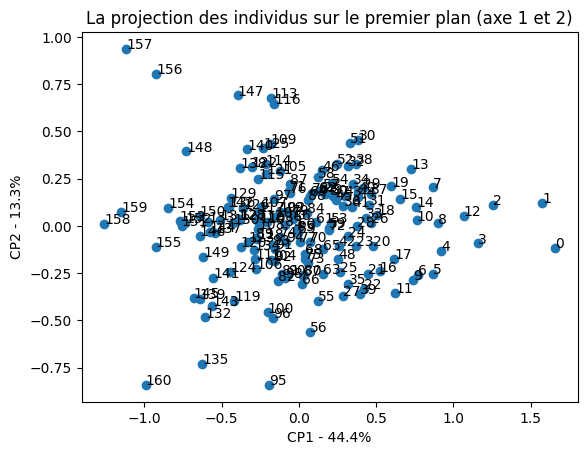

In [28]:
Donnees_apres_acp = pd.DataFrame(np.array(Donnes_ACP), index=[*range(0, 161, 1)],columns=Label)
plt.scatter(Donnees_apres_acp.CP1/4,Donnees_apres_acp.CP2/4)
plt.title("La projection des individus sur le premier plan (axe 1 et 2)")
plt.xlabel("CP1 - {0}%".format(information_apporte[0]))
plt.ylabel("CP2 - {0}%".format(information_apporte[1]))
for j in Donnees_apres_acp.index:
    plt.annotate(j,(Donnees_apres_acp.CP1.loc[j]/4,Donnees_apres_acp.CP2.loc[j]/4))
plt.show()

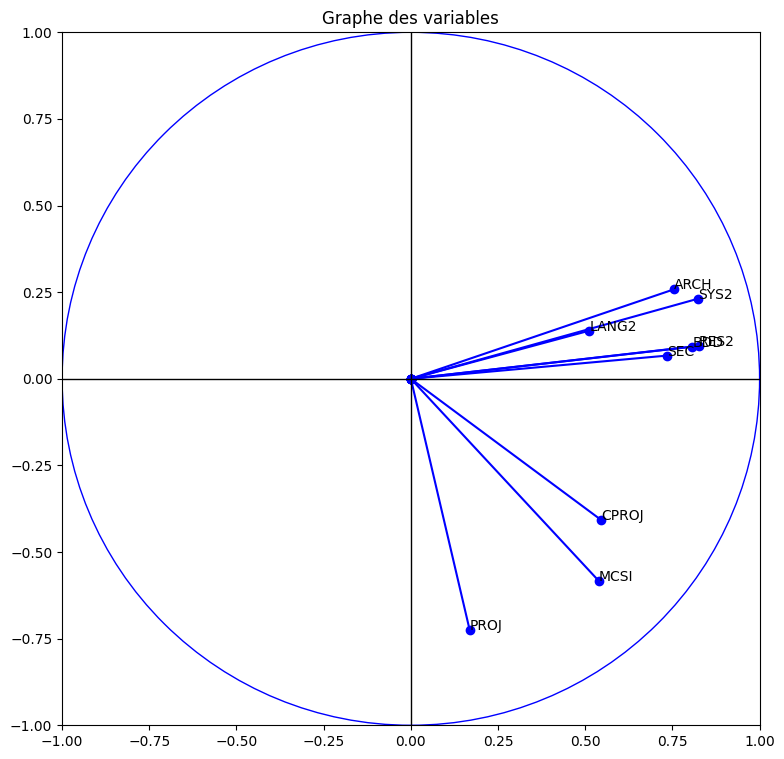

In [29]:
#plan engendré par les axes 1 et 3
fig, axes = plt.subplots(figsize=(9,9))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(9):
    plt.annotate(data_renomme.columns[j],(corrvar[j,0],corrvar[j,1]))
for k in range(9):
    plt.plot([0,corrvar[k,0]], [0,corrvar[k,1]], 'bo', linestyle="-")
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.title("Graphe des variables")
plt.show()

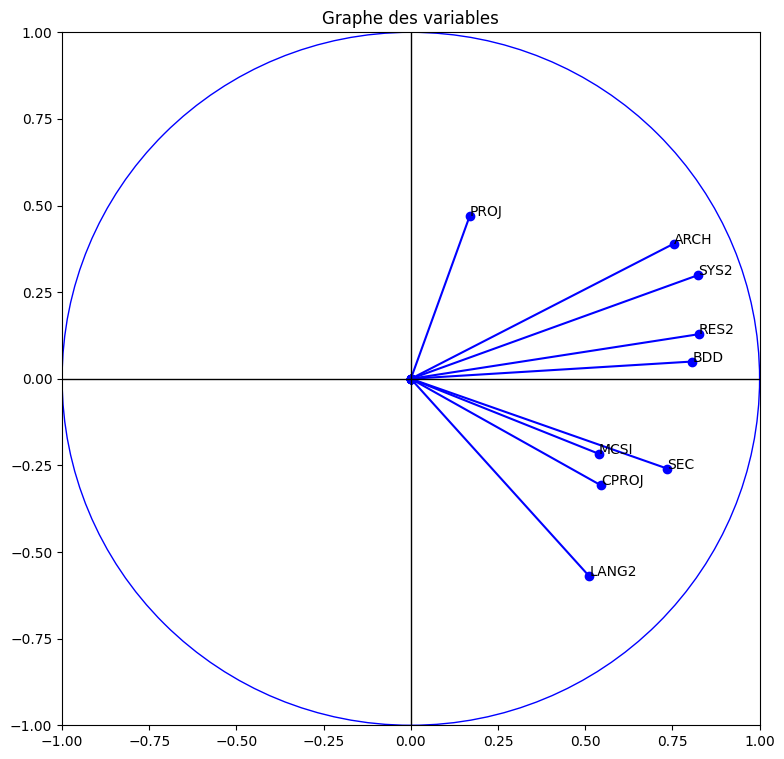

In [30]:
#plan engendré par les axes 1 et 3
fig, axes = plt.subplots(figsize=(9,9))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(9):
    plt.annotate(data_renomme.columns[j],(corrvar[j,0],corrvar[j,2]))
for k in range(9):
    plt.plot([0,corrvar[k,0]], [0,corrvar[k,2]], 'bo', linestyle="-")
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.title("Graphe des variables")
plt.show()

In [31]:
Note_Fentazi = Data_finale.iloc[31,:]
pd.DataFrame(np.array([["MCSI", "BDD", "SEC", "CPROJ", "PROJ", "LANG2", "ARCH", "SYS2", "RES2"],Note_Fentazi]))

,0,1,2,3,4,5,6,7,8
0,MCSI,BDD,SEC,CPROJ,PROJ,LANG2,ARCH,SYS2,RES2
1,12.1,13.95,12.42,14.5,13.76,16.02,13.68,11.35,13.65


#### Contribution des individus:

In [32]:
contribution_abs_individu = np.sum(Donnes_normalise**2,axis=1)
contribution_abs_fentazi = contribution_abs_individu[31]
contribution_abs_fentazi

6.0206436427437415

In [38]:
contribution_rel_individu = np.array(Donnes_ACP**2)
for j in range(9):
    contribution_rel_individu[:,j] = contribution_rel_individu[:,j]/(161*ACP.explained_variance_[j])
contribution_rel_individu = pd.DataFrame(contribution_rel_individu,columns=Label)
contribution_rel_individu
contribution_rel_fentazi = pd.DataFrame(np.array([Label[0:3],contribution_rel_individu.iloc[31,0:3]]))
contribution_rel_fentazi

,0,1,2
0,CP1,CP2,CP3
1,0.005129777332178406,0.001010722597638001,0.012205778473798782


C:\Users\Xodios\AppData\Local\Temp\ipykernel_15352\2174997197.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([0,corrvar[k,0]], [0,corrvar[k,1]], 'bo', linestyle="-",color="black")


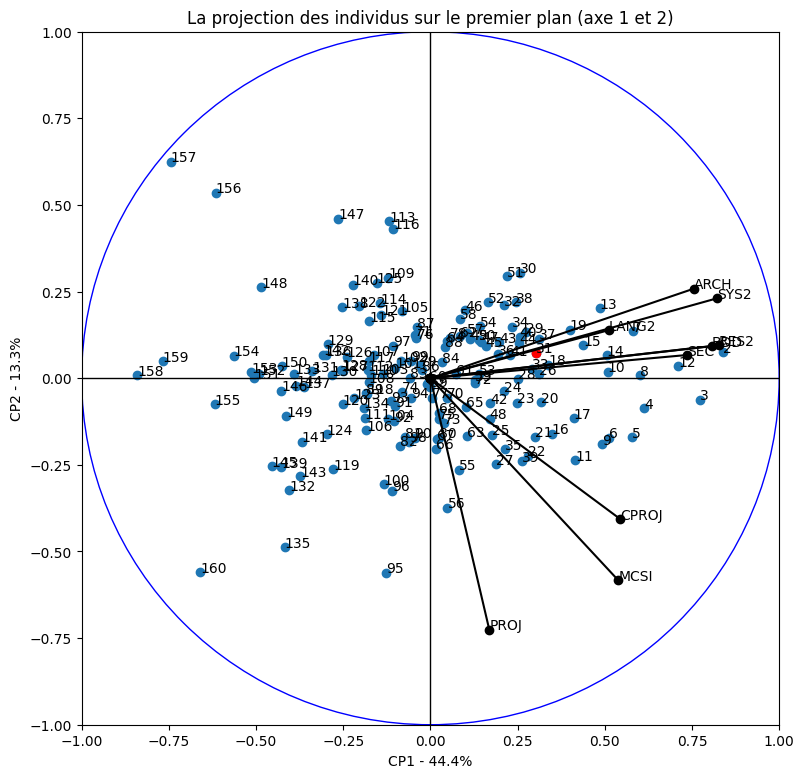

In [40]:
fig, axes = plt.subplots(figsize=(9,9))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(9):
    plt.annotate(data_renomme.columns[j],(corrvar[j,0],corrvar[j,1]))
for k in range(9):
    plt.plot([0,corrvar[k,0]], [0,corrvar[k,1]], 'bo', linestyle="-",color="black")
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
############################################
plt.scatter(Donnees_apres_acp.CP1/6,Donnees_apres_acp.CP2/6)
plt.scatter(Donnees_apres_acp.iloc[31,0]/6,Donnees_apres_acp.iloc[31,1]/6,color="red")
plt.title("La projection des individus sur le premier plan (axe 1 et 2)")
plt.xlabel("CP1 - {0}%".format(information_apporte[0]))
plt.ylabel("CP2 - {0}%".format(information_apporte[1]))
for sample in Donnees_apres_acp.index:
    plt.annotate(sample,(Donnees_apres_acp.CP1.loc[sample]/6,Donnees_apres_acp.CP2.loc[sample]/6))
plt.show()

C:\Users\Xodios\AppData\Local\Temp\ipykernel_15352\964966994.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([0,corrvar[k,0]], [0,corrvar[k,2]], 'bo', linestyle="-",color="black")


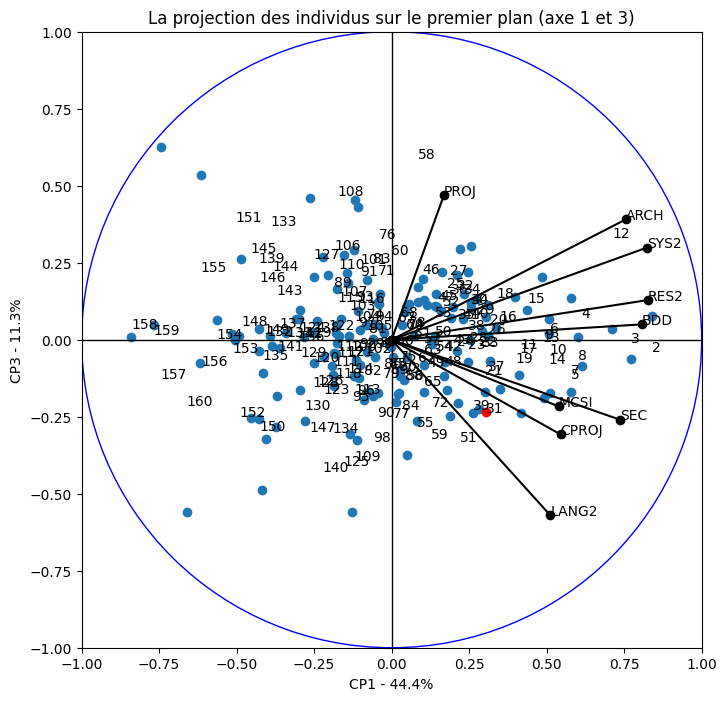

In [42]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for j in range(9):
    plt.annotate(data_renomme.columns[j],(corrvar[j,0],corrvar[j,2]))
for k in range(9):
    plt.plot([0,corrvar[k,0]], [0,corrvar[k,2]], 'bo', linestyle="-",color="black")
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
############################################
plt.scatter(Donnees_apres_acp.CP1/6,Donnees_apres_acp.CP2/6)
plt.scatter(Donnees_apres_acp.iloc[31,0]/6,Donnees_apres_acp.iloc[31,2]/6,color="red")
plt.title("La projection des individus sur le premier plan (axe 1 et 3)")
plt.xlabel("CP1 - {0}%".format(information_apporte[0]))
plt.ylabel("CP3 - {0}%".format(information_apporte[2]))
for sample in Donnees_apres_acp.index:
    plt.annotate(sample,(Donnees_apres_acp.CP1.loc[sample]/6,Donnees_apres_acp.CP3.loc[sample]/6))
plt.show()